# Prosper Loan Data Exploration
## by Katarzyna Lesiuk

## Preliminary Wrangling

This document explores a dataset containing information regarding 113.937 loans from Prosper Loan Marketplace listed between November 2005 and March 2014.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load data set
df = pd.read_csv('prosperLoanData.csv')
# display top 5 rows visually inspect the dataset
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# check basic information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# check the time span of data gathered
pd.to_datetime(df.ListingCreationDate)
(df.ListingCreationDate.min(), df.ListingCreationDate.max())

('2005-11-09 20:44:28.847000000', '2014-03-10 12:20:53.760000000')

### What is the structure of the dataset?

The Prosper Loan Data dataset contains 113937 loans listed between 2005-11-09 and 2014-03-10 on Prosper, i.e. an online loan marketplace for borrowers and lenders.
Each row represents one listing and multiple features for each loan are stored in the columns of the data frame (81 for each entry). The features include numerous borrower characterstics (both quantitative and qualitative in nature), loan features (rate, term, status, amounts related to loan origination and service etc.) as well as information related to loan investors.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in which features of the loan and the borrower have the greatest impact on loan defaults.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that Borrower related features including occupation, debt to income ratio, employment status, & duration as well as income range to influence loan defaults. Loan characteristics including term, amount and listing category are expected to have a somewhat lesser impact. 

## Data Assessment

As the original dataset includes a lot of variables that are outside the scope of this analysis the first step before any further analysis will be performed is to extract and clean the necessary data.
The variables chosen for further analysis will be limited to the following loan and borrower characteristics:
Loan features:
- ListingNumber
- ListingCreationDate
- CreditGrade
- ProsperRating (Alpha)
- Term
- LoanStatus
- BorrowerRate
- ListingCategory


Borrower features:
- EmploymentStatus
- EmploymentStatusDuration
- IsBorrowerHomeowner
- DebtToIncomeRatio
- IncomeRange

In [6]:
#create list of columns to be extracted from the original df
columns_list = ['ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ProsperRating (Alpha)', 'Term', 'LoanStatus', 'BorrowerRate', 'ListingCategory (numeric)', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'DebtToIncomeRatio', 'IncomeRange']
# create new df for further analysis
df = df[columns_list]
# check new df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   ListingCreationDate        113937 non-null  object 
 2   CreditGrade                28953 non-null   object 
 3   ProsperRating (Alpha)      84853 non-null   object 
 4   Term                       113937 non-null  int64  
 5   LoanStatus                 113937 non-null  object 
 6   BorrowerRate               113937 non-null  float64
 7   ListingCategory (numeric)  113937 non-null  int64  
 8   EmploymentStatus           111682 non-null  object 
 9   EmploymentStatusDuration   106312 non-null  float64
 10  IsBorrowerHomeowner        113937 non-null  bool   
 11  DebtToIncomeRatio          105383 non-null  float64
 12  IncomeRange                113937 non-null  object 
dtypes: bool(1), float64(3), int64

In [7]:
df['ProsperRating (Alpha)'].value_counts().sum()

84853

In [8]:
df['CreditGrade'].value_counts().sum()

28953

In [9]:
df['ProsperRating (Alpha)'].value_counts().sum() + df['CreditGrade'].value_counts().sum()

113806

In [10]:
# check if there are any records with double rating
df[~df['ProsperRating (Alpha)'].isnull() & ~df['CreditGrade'].isnull()].shape[0]

0

In [11]:
# check EmploymentStatus categories 
df.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [12]:
# check IncomeRange categories 
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [13]:
# check LoanStatus Categories
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [14]:
df[df['LoanStatus'].isin(['Cancelled'])].sample(5)

,ListingNumber,ListingCreationDate,CreditGrade,ProsperRating (Alpha),Term,LoanStatus,BorrowerRate,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,DebtToIncomeRatio,IncomeRange
112975,410006,2008-10-07 17:09:34.653000000,A,NaN,36,Cancelled,0.1075,1,Full-time,30.0,False,0.34000,"$25,000-49,999"
72480,908,2006-02-28 08:18:58.527000000,HR,NaN,36,Cancelled,0.2000,0,NaN,NaN,False,0.15248,Not displayed
332,8912,2006-04-26 22:23:10.147000000,HR,NaN,36,Cancelled,0.2375,0,NaN,NaN,True,0.10361,Not displayed
97281,11364,2006-05-05 03:16:59.510000000,HR,NaN,36,Cancelled,0.2375,0,NaN,NaN,False,0.01504,Not displayed
59998,7646,2006-04-25 07:59:15.203000000,C,NaN,36,Cancelled,0.1395,0,Not available,NaN,True,0.21321,Not displayed


Summary of identified quality issues:
- ListingNumber - incorect data type: int while it should be str
- ListingCreationDate - incorrect data type: object while should be datetype
- Term - is integer but ordered category fits better in this case
- CreditGrade & Prosper Rating - incorrect data type: object while should be ordered category, also because until 2009 different credit rating was used there are two columns that store credit ratings
- Listing Category - additional string after blank space in column name, numeric values difficult to interpret as a dictionary with assignes values is needed
- Loan Status - status Cancelled: not useful for further analysis, Past Due statuses - as all of the Past Due statuses indicate a payment default, the precise distinction of days past due is not relevant for the analysis to be performed
- Employment Status - category "Not available" instead of NaN
- Income Range - category "Not displayed" is a type of NaN, not employed implies that the income range is equal to 0USD, once these are corrected the the data type should be converter to ordered category

## Data Cleaning

In [15]:
# copy the original df before cleaning

df_final = df.copy()

### Listing Number

change date type from integer to string

In [16]:
df_final.ListingNumber = df_final.ListingNumber.astype('str')

In [17]:
# check dtype
df_final.ListingNumber.dtype

dtype('O')

### ListingCreationDate

change data type from object to datetime

In [18]:
df_final.ListingCreationDate = pd.to_datetime(df_final.ListingCreationDate)

In [19]:
df_final.ListingCreationDate.dtype

dtype('<M8[ns]')

## Term
convert data type to ordered categorical type

In [20]:
# convert to ordered categorical
cat_dtype = pd.api.types.CategoricalDtype(categories=[12, 36, 60], ordered=True)
df_final.Term = df_final.Term.astype(cat_dtype)

In [21]:
#check data type
df_final.Term.dtype

CategoricalDtype(categories=[12, 36, 60], ordered=True)

In [22]:
df_final.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

### CreditGrade & Prosper Rating
combine credit ratings currently stored in two variables to one colums 'CreditRating', drop excess columns and change data type of newly created columns from object to ordered category,

In [23]:
# combine credit ratings from both columns and remove nan strings
df_final['CreditRating'] = (df_final['CreditGrade'].astype(str) + df_final['ProsperRating (Alpha)'].astype(str)).str.replace('nan', '')
# replace empty cells and NS values with np.nan
df_final['CreditRating'] = df_final['CreditRating'].replace(['', 'NC'], np.nan)
# drop excess columns
df_final.drop(columns=['CreditGrade', 'ProsperRating (Alpha)'], inplace=True)
df_final['CreditRating'].value_counts()

C     23994
B     19970
D     19427
A     17866
E     13084
HR    10443
AA     8881
Name: CreditRating, dtype: int64

In [24]:
# convert data type of 'CreditRating' to ordered categorical type

cat_dtype = pd.api.types.CategoricalDtype(categories=['HR', 'E', 'D', 'C', 'B', 'A', 'AA'], ordered=True)
df_final.CreditRating = df_final.CreditRating.astype(cat_dtype)

In [25]:
# check final Credit Rating counts & dtype
df_final.CreditRating.value_counts().index

CategoricalIndex(['C', 'B', 'D', 'A', 'E', 'HR', 'AA'], categories=['HR', 'E', 'D', 'C', 'B', 'A', 'AA'], ordered=True, dtype='category')

In [26]:
df_final.CreditRating.value_counts()

C     23994
B     19970
D     19427
A     17866
E     13084
HR    10443
AA     8881
Name: CreditRating, dtype: int64

In [27]:
#check if columns successfully dropped
df_final.columns.isin(['CreditGrade', 'ProsperRating (Alpha)']).sum()

0

### Listing Category

Replace numeric values with descriptions for easier interpretability, rename column to ListingCategory

In [28]:
#rename column
df_final.rename(columns={"ListingCategory (numeric)": "ListingCategory"}, inplace=True)
#replace numeric values with  descriptions / np.nan
value_map = {0: np.nan, 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan', 5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure', 11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}
df_final.replace({'ListingCategory': value_map}, inplace=True)
# check updated statuse value counts
df_final.ListingCategory.value_counts()

Debt Consolidation    58308
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

### Loan Status

The Loan Status variable is crucial for further anaysis, as determining which factors influcence the possibility of a loan falling into one of the default categories is the aim of the exploration.

According to [Prosper Investment Glossary](https://www.prosper.com/investor/glossary): "Active Loans means loans that are current in payments or delinquent less than 120 days. Loans that have paid off, charged-off or are in default are not considered active."

Since it is interesting to see statistics for both active and closed loans I decided to assign the existing statuses the the following newly created categories:

1. active_performing: Current
2. active_nonperforming: all Past Due categories below 120 days
3. closed_performing: Completed, FinalPaymentinProgress
4. closed_nonperforming: Chargedoff, Defaulted, Past Due (>120 days)

The Cancelled category will be dropped as it is not relevant for further analysis.

Also for further visual analysis it will be beneficial if the newly assigned categories are ordered, so a transformation of the data type will be performed as well.

In [29]:
# reassign categories
value_map_ls = {'Current': 'a_performing', 
                'Completed': 'c_performing', 
                'Chargedoff': 'c_nonperforming', 
                'Defaulted': 'c_nonperforming', 
                'Past Due (1-15 days)': 'a_nonperforming',
                'Past Due (16-30 days)': 'a_nonperforming',
                'Past Due (31-60 days)': 'a_nonperforming',
                'Past Due (61-90 days)': 'a_nonperforming', 
                'Past Due (91-120 days)': 'a_nonperforming',
                'FinalPaymentInProgress': 'c_performing', 
                'Past Due (>120 days)': 'c_nonperforming'}
               
df_final.replace({'LoanStatus': value_map_ls}, inplace=True)     

#drop rows with Cancelled status
df_final.drop(df_final[df_final.LoanStatus == 'Cancelled'].index, inplace=True)

#convert to ordered category

cat_dtype = pd.api.types.CategoricalDtype(categories=['a_performing', 'a_nonperforming', 'c_performing', 'c_nonperforming'], ordered=True)
df_final.LoanStatus = df_final.LoanStatus.astype(cat_dtype)

In [30]:
#check if reassignment was successful
df_final.LoanStatus.value_counts().index

CategoricalIndex(['a_performing', 'c_performing', 'c_nonperforming',
                  'a_nonperforming'],
                 categories=['a_performing', 'a_nonperforming', 'c_performing', 'c_nonperforming'], ordered=True, dtype='category')

### Employment Status
replace 'Not available' with np.nan

In [31]:
# replace 'Not available' with NaN
df_final.EmploymentStatus.replace('Not available', np.nan, inplace=True)
#check if category was removed from value_counts
df_final.EmploymentStatus.value_counts().index

Index(['Employed', 'Full-time', 'Self-employed', 'Other', 'Part-time',
       'Not employed', 'Retired'],
      dtype='object')

## Income Range
* replace "Not displayed" with np.nan,
* reassign "not employed" to income range 0USD category
* change data type  to ordered categorical

In [32]:
df_final.IncomeRange.value_counts()

$25,000-49,999    32191
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7737
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [33]:
# replace 'Not displayed' with np.nan 
df_final.IncomeRange.replace('Not displayed', np.nan, inplace=True)

# reassign "not employed" to income range 0USD category
df_final.IncomeRange.replace('Not employed', '$0', inplace=True)

# change data type to ordered categorical
cat_dtype = pd.api.types.CategoricalDtype(categories=['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'], ordered=True)
df_final.IncomeRange = df_final.IncomeRange.astype(cat_dtype)

In [34]:
#check final ordered income range categories & dtype
df_final.IncomeRange.value_counts().index

CategoricalIndex(['$25,000-49,999', '$50,000-74,999', '$100,000+',
                  '$75,000-99,999', '$1-24,999', '$0'],
                 categories=['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'], ordered=True, dtype='category')

## Final check and save clean dataframe

In [35]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113932 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ListingNumber             113932 non-null  object        
 1   ListingCreationDate       113932 non-null  datetime64[ns]
 2   Term                      113932 non-null  category      
 3   LoanStatus                113932 non-null  category      
 4   BorrowerRate              113932 non-null  float64       
 5   ListingCategory           96971 non-null   object        
 6   EmploymentStatus          106334 non-null  object        
 7   EmploymentStatusDuration  106311 non-null  float64       
 8   IsBorrowerHomeowner       113932 non-null  bool          
 9   DebtToIncomeRatio         105378 non-null  float64       
 10  IncomeRange               106195 non-null  category      
 11  CreditRating              113660 non-null  category      
dtypes:

In [36]:
df_final.head()

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerRate,ListingCategory,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,DebtToIncomeRatio,IncomeRange,CreditRating
0,193129,2007-08-26 19:09:29.263,36,c_performing,0.1580,NaN,Self-employed,2.0,True,0.17,"$25,000-49,999",C
1,1209647,2014-02-27 08:28:07.900,36,a_performing,0.0920,Home Improvement,Employed,44.0,False,0.18,"$50,000-74,999",A
2,81716,2007-01-05 15:00:47.090,36,c_performing,0.2750,NaN,NaN,NaN,False,0.06,NaN,HR
3,658116,2012-10-22 11:02:35.010,36,a_performing,0.0974,Motorcycle,Employed,113.0,True,0.15,"$25,000-49,999",A
4,909464,2013-09-14 18:38:39.097,36,a_performing,0.2085,Home Improvement,Employed,44.0,True,0.26,"$100,000+",D


Note regarding missing values: at this stage some of the variables have missing values, they will be accounted for individually as I progress towards bivariate and multivariate analysis. 

In [37]:
#saving final data frame to a csv file
df_final.to_csv('ProsperLoanData_clean.csv', index=False, date_format='%s')

## Univariate Exploration

### Loan Status

First let's have a look at the distribution of loans per loan status

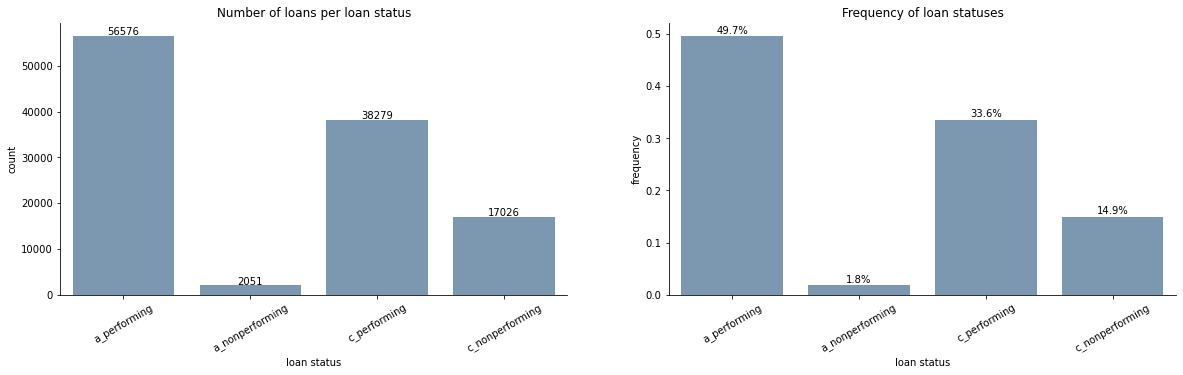

In [38]:
#set palette for further analysis
sb.set_palette("ch:start=.2,rot=-.3")
color = sb.color_palette()[2]

plt.figure(figsize=[20,5])

# generate barplot for the loan status variable
plt.subplot(1, 2, 1)
sb.countplot(data=df_final, x='LoanStatus', color = color)
plt.xticks(rotation=30)
sb.despine()
plt.xlabel('loan status')
plt.title('Number of loans per loan status')

# print values above bars
counts = df_final.LoanStatus.value_counts(sort=False)
for i in range(counts.shape[0]):
    count = counts.values[i]
    plt.text(i, count+200, count, ha='center');

plt.subplot(1, 2, 2)

status_freq = df_final.LoanStatus.value_counts(sort=False, normalize=True)
sb.barplot(x=status_freq.index.values, y=status_freq, color=color)
plt.ylabel('frequency')
plt.xlabel('loan status');
plt.xticks(rotation=30)
sb.despine(bottom = False, left = False)
plt.title('Frequency of loan statuses')

# print values above bars
for i in range(status_freq.shape[0]):
    freq = status_freq.values[i]
    plt.text(i, freq+0.005, '{:0.1%}'.format(freq), ha='center');
    

Almost 50% of the loans in the dataset (56.5k) are in active_performing status, followed by ca. 34% of closed_performing (38.3k) and almost 15% of closed_nonperforming.

The measure that is used to asess portfolio performance is colled delinquency rate. It is the share of delinquent loans in the total portfolio. In the following cells I will calculate and visualize this measure for both active and closed transactions as well as for the whole portfolio.

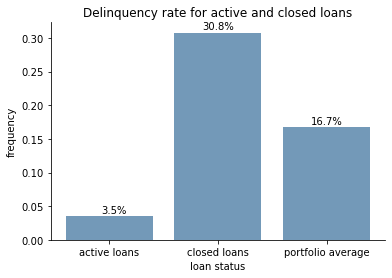

In [39]:
# calculate ratio of nonperforming to performing loans
active_ratio = df_final[df_final.LoanStatus == 'a_nonperforming'].shape[0] / (df_final[df_final.LoanStatus == 'a_performing'].shape[0] +df_final[df_final.LoanStatus == 'a_nonperforming'].shape[0])
closed_ratio = df_final[df_final.LoanStatus == 'c_nonperforming'].shape[0] / (df_final[df_final.LoanStatus == 'c_performing'].shape[0] + df_final[df_final.LoanStatus == 'c_nonperforming'].shape[0])
portfolio_ratio = (df_final[df_final.LoanStatus == 'a_nonperforming'].shape[0] + df_final[df_final.LoanStatus == 'c_nonperforming'].shape[0]) / df_final.LoanStatus.count() 

#plot bar chart
plt.bar(x=['active loans', 'closed loans', 'portfolio average'], height=[active_ratio, closed_ratio, portfolio_ratio], color=color)
plt.text(0.04, active_ratio+0.005, '{:0.1%}'.format(active_ratio), ha='center')
plt.text(1, closed_ratio+0.005, '{:0.1%}'.format(closed_ratio), ha='center')
plt.text(2, portfolio_ratio+0.005, '{:0.1%}'.format(portfolio_ratio), ha='center')
plt.ylabel('frequency')
plt.xlabel('loan status')
plt.title('Delinquency rate for active and closed loans')
sb.despine();

The average historical delinquency rate in the Prosper portfolio is relatively high at 16.7%.
The fact that the ratio of nonperforming to performing is higher for the closed listings compared to active listings is intuitive. On the other hand the fact that as many as 30.8% of closed transactions were defaulted is surprising. This feature requires further analysis as there might be several explanations for this. One of the issues that definitely needs to be looked at in bivariate anlaysis is the time component - escpecially in terms how the delinquency rate developed over time and if we can recognize any patterns related to rating system delelopment. 

## Term
The distribution of loans per term category is depicted below

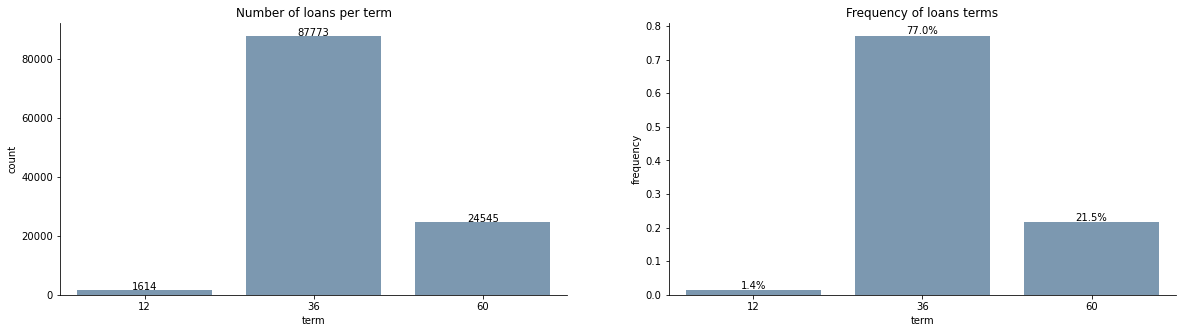

In [40]:
# generate barplot for the loan term variable
plt.figure(figsize=[20,5])

plt.subplot(1, 2, 1)
sb.countplot(data=df_final, x='Term', color = color)
sb.despine()
plt.xlabel('term')
plt.title('Number of loans per term')

# print values above bars
counts = df_final.Term.value_counts(sort=False)
for i in range(counts.shape[0]):
    count = counts.values[i]
    plt.text(i, count+200, count, ha='center');

# generate barplot for the loan term frequency
plt.subplot(1, 2, 2)

term_freq = df_final.Term.value_counts(sort=False, normalize=True)
sb.barplot(x=term_freq.index.values, y=term_freq, color=color)
plt.ylabel('frequency')
plt.xlabel('term')
sb.despine()
plt.title('Frequency of loans terms')

# print values above bars
for i in range(term_freq.shape[0]):
    term = term_freq.values[i]
    plt.text(i, term+0.005, '{:0.1%}'.format(term), ha='center');

The majority of loans (77%) were 36 month loans, followed by 21,5% of 60 month loans and just 1,4% of 12 month loans.

## Borrower rate

The following charts depict the histogram and the box plot of borrower rates. As the box plot indicates that there are several outliers above the upper bound of the interquartile range, limits were set the improve visibility of the histogram. Also as rate distribution is quite dense, the number of bins was increased for better visibility (tick=0,0125).

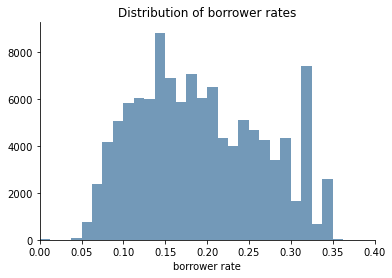

In [41]:
# create histogram for borrower rates
plt.hist(data=df_final, x='BorrowerRate', bins=np.arange(0, 0.5, 0.0125), color=color)
plt.xlabel('borrower rate')
plt.xticks(np.arange(0, 0.5, 0.05))
plt.title('Distribution of borrower rates')
plt.xlim(0,0.4)
sb.despine();

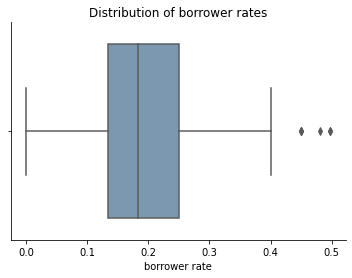

In [42]:
# create box plot of to inspect outliers
sb.boxplot(data=df_final, x='BorrowerRate', color=color)
plt.xlabel('borrower rate')
plt.title('Distribution of borrower rates')
sb.despine();

The distribution fo borrower rates has a bimodal shape with most of the observations having a rate of approximately 13,75%-15% and 1 additional minor peak at 31,25% respectively.
There are several outliers above the interquartile range and also some observations with borrower rates as low as 0. Let us inspect these a little closer.

In [43]:
mask = df_final[df_final.BorrowerRate.between(0, 0.0125)]
mask

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerRate,ListingCategory,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,DebtToIncomeRatio,IncomeRange,CreditRating
1484,69022,2006-12-01 10:04:58.993,36,c_performing,0.0100,NaN,NaN,NaN,False,0.20000,NaN,E
5823,156918,2007-06-23 10:32:34.540,36,c_performing,0.0115,NaN,Full-time,0.0,False,0.12000,"$25,000-49,999",D
15993,246366,2007-12-07 08:09:25.833,36,c_nonperforming,0.0100,Debt Consolidation,Full-time,32.0,False,0.25000,"$1-24,999",D
26650,49987,2006-10-18 11:51:32.590,36,c_nonperforming,0.0099,NaN,NaN,NaN,True,0.18000,NaN,HR
29859,34125,2006-08-25 11:10:06.193,36,c_performing,0.0000,NaN,NaN,NaN,True,0.07000,NaN,AA
33287,223827,2007-10-31 10:31:36.283,36,c_performing,0.0100,NaN,Full-time,50.0,False,0.27000,"$25,000-49,999",C
37201,394526,2008-09-07 20:55:32.837,36,c_performing,0.0100,Student Use,Part-time,0.0,False,NaN,"$1-24,999",E
38187,168141,2007-07-12 11:32:43.287,36,c_performing,0.0100,NaN,Not employed,125.0,False,NaN,$0,B
44713,2374,2006-03-18 13:34:16.420,36,c_performing,0.0100,NaN,NaN,NaN,False,0.00677,NaN,HR
46874,143562,2007-05-28 06:40:54.803,36,c_nonperforming,0.0000,NaN,Full-time,1.0,False,0.01000,"$50,000-74,999",HR


In [44]:
print(mask.shape)
print(mask.ListingCreationDate.min(), mask.ListingCreationDate.max())
mask.CreditRating.value_counts(sort=False)

(25, 12)
2006-03-18 13:34:16.420000 2008-09-07 20:55:32.837000


HR    8
E     3
D     5
C     4
B     3
A     1
AA    1
Name: CreditRating, dtype: int64

There seems to be nor regularity with regards to the lowest borrower rates included in the dataset except for the fact that these are all relatively old (2006-2008) records for closed loans. However one would expect that if these borrowers were granted such favorable terms they should be in the highest credit rating category, while it is exactly the opposite - most of the records with lowest rates have ratings between HR and C with only 5 belonging to the 3 highest rating categories. As these extremely low rate loans are a relatively small group of 25 records and it seems likely that information on borrower rates might not be correct they should be excluded from the dataset for further analysis as they might distort the overall conclusions.

In [45]:
mask2 = df_final[df_final.BorrowerRate.between(0.4, 0.5)]
mask2

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerRate,ListingCategory,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,DebtToIncomeRatio,IncomeRange,CreditRating
14160,2372,2006-03-18 12:52:18.843,36,c_nonperforming,0.4000,NaN,NaN,NaN,False,0.18002,NaN,HR
18326,1795,2006-03-11 15:43:45.393,36,c_nonperforming,0.4500,NaN,NaN,NaN,False,0.10252,NaN,HR
22195,1849,2006-03-12 13:44:15.060,36,c_nonperforming,0.4500,NaN,NaN,NaN,False,0.35430,NaN,HR
36018,690,2006-02-23 13:57:02.087,36,c_performing,0.4975,NaN,NaN,NaN,False,0.02852,NaN,HR
56761,2231,2006-03-16 19:30:16.753,36,c_nonperforming,0.4975,NaN,NaN,NaN,False,0.03909,NaN,HR
82043,1112,2006-03-02 19:00:17.593,36,c_nonperforming,0.4800,NaN,NaN,NaN,False,0.10021,NaN,HR
95035,1798,2006-03-11 16:00:10.990,36,c_nonperforming,0.4000,NaN,NaN,NaN,False,0.10773,NaN,HR
103973,1366,2006-03-06 22:36:53.753,36,c_nonperforming,0.4500,NaN,NaN,NaN,False,0.19413,NaN,HR


In [46]:
print(mask2.shape)
print(mask2.ListingCreationDate.min(), mask2.ListingCreationDate.max())
mask2.CreditRating.value_counts(sort=False)

(8, 12)
2006-02-23 13:57:02.087000 2006-03-18 12:52:18.843000


HR    8
E     0
D     0
C     0
B     0
A     0
AA    0
Name: CreditRating, dtype: int64

On the other side of the extreme we observe loans with borrower rates as high as 40%-50%.
This subset however is consistent with what could be expected - all of the 8 records have credit rating HR and all except one belong to the nonperforming category. Also these loans were all originated in 2006.  
However as these several extreme observations could impact the results of further analysis I also recommend to remove them from the dataset.

In [47]:
#drop rows with rates meeting criteria spec. above
df_final.drop(index=mask.index, inplace=True)
df_final.drop(index=mask2.index, inplace=True)

#check
assert df_final[df_final.BorrowerRate.between(0, 0.0125)].shape[0] + df_final[df_final.BorrowerRate.between(0.4, 0.5)].shape[0] == 0

## Listing Category

Now let's take a look at the distribution of loans across Listing Categories. This variable has a significant amount of NaN values - almost 17k records, i.e. 15% of all observations have missing data and also there are 20 different categories, which makes it potentially difficult to make meaningful conclusions based on this variable.

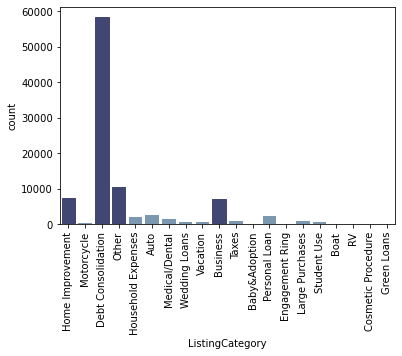

In [48]:
# create a barchart for Listing Category

countp = sb.countplot(data=df_final, x='ListingCategory', color=color)
plt.xticks(rotation=90)

# set a different color for 4 most frequent categories
color2 = sb.color_palette()[4]
height = df_final.ListingCategory.value_counts()[3]

for bar in countp.patches:
    if bar.get_height() >= height:
        bar.set_color(color2);

Debt consolidation with a count of almost 60k observations is by far the most popular listing category making up 60% of the loan portfolio. The remaining observations are dispersed between all of the other categories with the only ones worth mentioning being home imporovement (ca. 7,7% of observations) and Business (7,4%). As such the categories without any further aggregation will not be particularily useful for futher analysis, however we could compare delinquencies for debt consolidations and other categories (aggregated to one 'Other' bucket) to see if there are any patterns related to the fact that debt consolidation imples that the borrower already had a significant amount of debt before assuming the prosper loan.

In [49]:
#replace values other than Debt consolidation with 'Other'
df_final.ListingCategory = df_final.ListingCategory.apply(lambda x: x if x == 'Debt Consolidation' else 'Other')
    
# check updated statuse value counts
df_final.ListingCategory.value_counts()

Debt Consolidation    58304
Other                 55595
Name: ListingCategory, dtype: int64

## Employment Status and Employment Status Duration

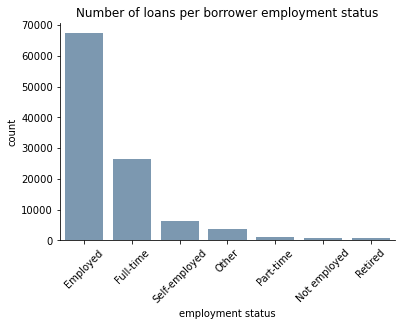

In [50]:
#plot barplot for employment status variable

sb.countplot(data=df_final, x='EmploymentStatus', color=color, order=df_final.EmploymentStatus.value_counts().index)
sb.despine()
plt.xticks(rotation=45)
plt.xlabel('employment status')
plt.title('Number of loans per borrower employment status');

Majority of the borrowers had either "Employed" (67.3k) or "Full-time" (26.3k) employment status, both these categories accounted for 88% of the observations in data set. That being the case it will be difficult to observe any meaningful relationships between occupation type and loan delinquency as other categories will not have enough observations for analysis.

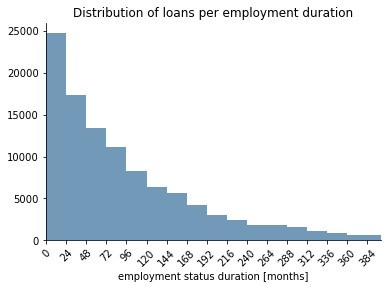

In [51]:
#plot histogram for employment status duration variable

plt.hist(data=df_final, x='EmploymentStatusDuration', color=color, bins=np.arange(0,800,24));
sb.despine()
plt.xticks(np.arange(0,800,24), rotation=45)
plt.xlabel('employment status duration [months]')
plt.title('Distribution of loans per employment duration')
plt.xlim(0,400);

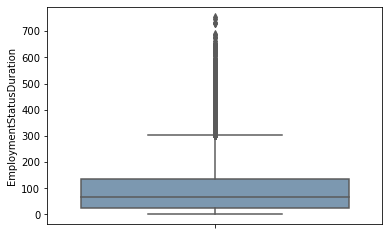

In [52]:
# plot boxplot for employment status duration variable
sb.boxplot(data=df_final, y='EmploymentStatusDuration', color=color);

The distribution of employment status duration is right skewed with a very thin and long tail of observations above the interquartile range. I would have expected employment duration to be more normally distributed, however the distribution of this particular variable might be something unique to the Prosper borrowers as this type of peer-to-peer borrowing probably attracts especially (1) young people (2) people with lesses chance of obtaining favorable loan conditions at traditional banks due to poorer scoring (which might relate to shorter emplyment history).

## Is Borrower Homeowner

It is also interesting to see whether we can recognize any relationship between the borrower being a homeowner (or not) and loan performance. This will be further explored in the bivariate analysis section and for now let us see if there are enough observations in both categories to conduct this analysis.

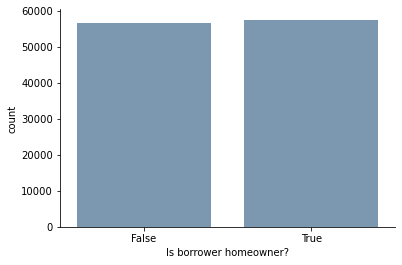

In [53]:
sb.countplot(data=df_final, x='IsBorrowerHomeowner', color=color)
sb.despine()
plt.xlabel('Is borrower homeowner?');

Interestingly allocation of observations to both 'Homeowner' categories is almost equal.

## Debt to Income Ratio

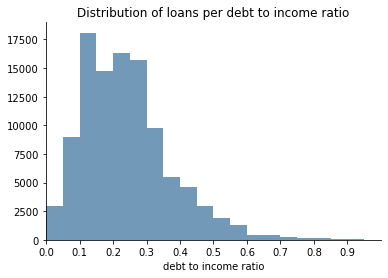

In [54]:
#plot histogram for debt to income ratio variable

plt.hist(data=df_final, x='DebtToIncomeRatio', color=color, bins=np.arange(0, 1, 0.05));
sb.despine()
plt.xticks(np.arange(0, 1, 0.10))
plt.xlabel('debt to income ratio')
plt.title('Distribution of loans per debt to income ratio')
plt.xlim(0,1);

This distribution is extremely skewed with a lot of observations above the upper limit of the interquartile range. Logarithmic transformation did not improve visibility as the positive tail was too long for this transformation to be sufficient.
Therefore after checking the distribution and outliers on the boxplot a limit was set at 1 as this is the level at which it can be expected that a borrower is highly likely to have trouble servicing ist debt - debt to income ratio of 1 means that this borrowers obligations exceeded his/her income (the upper limit of the interquartile range is 0.6). Additionaly custom bins were introcuded with a tick of 0.05.
After these changes it can be observed that most of the observations fall in the range between 0.10 and 0.25.

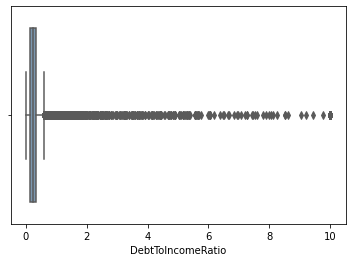

In [55]:
# plot boxplot for employment status duration variable
sb.boxplot(data=df_final, x='DebtToIncomeRatio', color=color);

In [56]:
Q1 = df_final.DebtToIncomeRatio.quantile(0.25)
Q3 = df_final.DebtToIncomeRatio.quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
upper_bound

0.5900000000000001

## Income Range

In [57]:
df_final.IncomeRange.value_counts()

$25,000-49,999    32185
$50,000-74,999    31049
$100,000+         17336
$75,000-99,999    16915
$1-24,999          7267
$0                 1425
Name: IncomeRange, dtype: int64

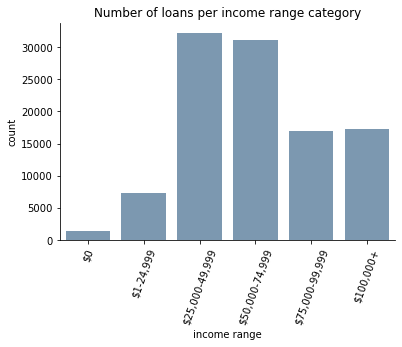

In [58]:
# create bar chart for Icome Range
sb.countplot(data=df_final, x='IncomeRange', color=color)
sb.despine()
plt.xticks(rotation=70)
plt.xlabel('income range')
plt.title('Number of loans per income range category');

Most of the borrowers are either in the 25-49kUSD or 50-74kUSD range (32k and 31k respectively). Logically there have been very few borrowers with no or very low income. Similarily people whose income exceeded 75kUSD seem to be less likely to use Prosper's services.

## Credit Rating    

In [59]:
df_final.CreditRating.value_counts()

C     23989
B     19967
D     19422
A     17864
E     13081
HR    10424
AA     8880
Name: CreditRating, dtype: int64

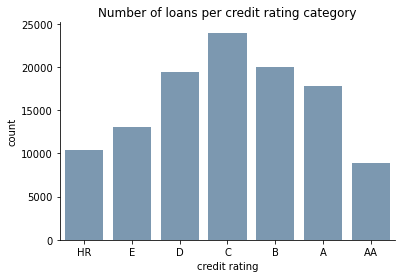

In [60]:
sb.countplot(data=df_final, x='CreditRating', color=color)
sb.despine()
plt.xlabel('credit rating')
plt.title('Number of loans per credit rating category');

As expected the most frequently occuring ratings are the ones in the middle of the rating scale, as low ratings probably get rejected more often and borrowers with good ratings tend to use other, less expensive sources of financing.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

1. A new measure of delinquency rate was introduced (ratio of nonperforming  to all listings) - the average historical delinquency rate in the Prosper portfolio is relatively high at 16.7% and even higher for the closed transactions (30,8%).
2. Borrower rates - the distribution fo borrower rates has a bimodal shape with most of the observations having a rate of approximately 13,75% and 1 additional minor peak at 31,25%, which is a surprisingly high value. The dataset included observations with borrower rates as low as 0% and a high as 50%, so additional analysis was performed to determine if these values should be kept in the data set.
3. Debt consolidation with a count of almost 60k observations is by far the most popular listing category making up 60% of the loan portfolio.
4. The distribution of employment status duration is right skewed with most of the borrowers having a short employment history.
5. Debt to income ratio - most of the observations have a DtIR between 0.1-0.25, however the distribution had a very long positive tail with some of the values being as high as 10.
6. A general conclusion is that a typical Prospect borrower would be someone with relatively short employment history, with annual income between 25-75k USD and a credit rating between B-D. Approximately 50% of Prosper borrowers were homeowners and most loans had a tenor of 36 months. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There were several cleaning steps performed on the data as described in the data cleaning section (most importandly the loan status category was redefined).
As a result of the univariate exploration of data the following additional changes were implemented:

1. Borrower rates - outliers, i.e. observations with extremely low (0-0.0125) and extremenly high (0.4-0.5) borrower rates were excluded from the data frame not to distort further analysis and to impreve visibility.

2. Listing Category  - as majority of the observations (60%) is in the debt consolidation category other categories will be aggregated to one 'Other' category to see if there are any patterns related to the fact that debt consolidation implies that the borrower already had a significant amount of debt before assuming the prosper loan.

## Bivariate Exploration

### Loan status vs. Loan features

In this section I will plot and analyze pairwise relationships between loan status categories and loan feature categories.

#### Loan Status vs Term

First of all let's see if there are any patterns related to Loan Status and Loan Term.

C:\Users\plesi\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


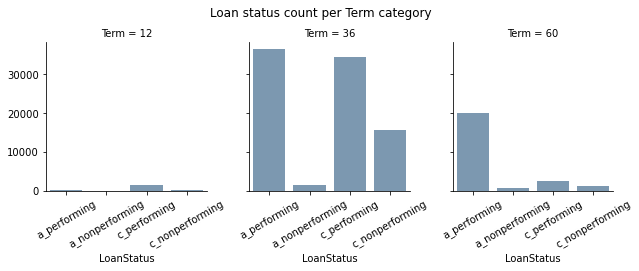

In [61]:
# create facet grid with loan status frequencies per loan term
g = sb.FacetGrid(data=df_final, col='Term')
g.map(sb.countplot, 'LoanStatus', color=color)
g.set_xticklabels(rotation=30)
g.fig.suptitle('Loan status count per Term category', y=1.05);

Below a heatmap is plotted with relative frequencies of each loan status per Term category (values sum up to 100 across terms)

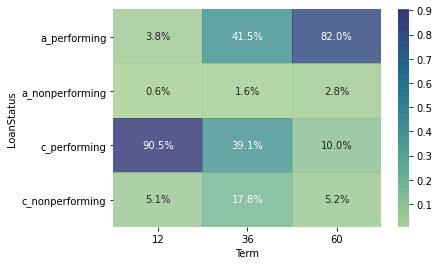

In [62]:
# create df with frequencies of each loan status per term category
df_LvT = df_final.groupby('Term')['LoanStatus'].value_counts(normalize=True)
df_LvT = df_LvT.reset_index(name='count')
df_LvT = df_LvT.pivot(index='LoanStatus', columns='Term', values='count')
#plot heatmap
sb.heatmap(df_LvT, annot=True, cmap="crest", alpha=0.8, fmt=".1%");

Because of a relatively small number of records in the 12 and 60 month category it is difficult to interpret the visuals only based on barcharts. Therefore a heatmap with relative frequencies was created to allow for comparison between categories.  
Interestingly it seems that even though the 12m category has a very good structure in terms of its share of delinquent loans (only 5% of closed loans were nonperforming) it seems to be almost discontinued, as it's share of performing observations is only 4,4%.  
The 60m category on the other hand does not have many observations in the closed categories (only 15% of the total nr of loans), and seemingly has a very good structure in terms of performance (82% of the total portfolio are active_performing and in total 92% are performing loans). However this might be attributed to the fact that this portfolio is relatively new and has a large share of new loans (i'll check it while performing the timecomponent analysis).
Still, this feature looks promising in terms of its value as a predictor of loan delinquency.

#### Loan status vs Borrower Rate

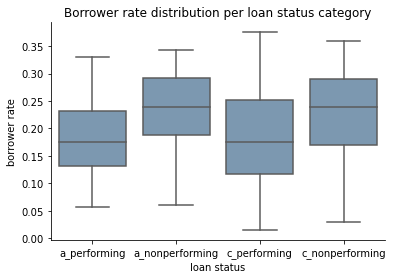

In [63]:
# plot boxplots for Loan status vs Borrower Rate
sb.boxplot(data=df_final, x='LoanStatus', y='BorrowerRate', color=color)
sb.despine()
plt.xlabel('loan status')
plt.ylabel('borrower rate')
plt.title('Borrower rate distribution per loan status category');

As expected the median borrower rates for nonperforming loan statuses are higher than those of performing loan statuses.
It is interesting that the closed categories have a wider interquartile range than the active categories, which might indicate that Prosper changed its rate policy over time.

#### Loan status vs Listing category

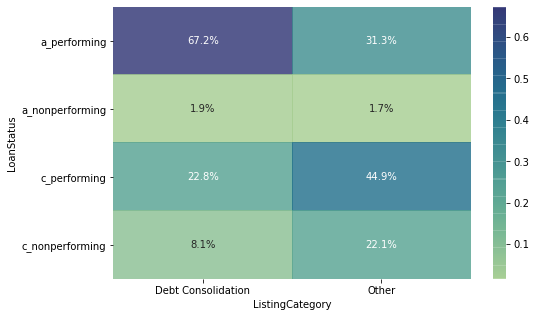

In [64]:
# create df with frequencies of each loan status per listing category
df_LvT = df_final.groupby('ListingCategory')['LoanStatus'].value_counts(normalize=True)
df_LvT = df_LvT.reset_index(name='count')
df_LvT = df_LvT.pivot(index='LoanStatus', columns='ListingCategory', values='count')
#plot heatmap
plt.figure(figsize=[8,5])
sb.heatmap(df_LvT, annot=True, cmap="crest", alpha=0.8, fmt=".1%");

It looks like Debt consolidation - contrary to my initial assumptions, has a better structure in terms of performance compared to the other listing categories (grouped in one bucket). While 90 % of debt consolidation listings belong to performing categories, compared to 76% among other loans. However this heatmap also shows that the share of active transactions is much higher for this category, therefore this feature would have to observed more closely in the long run.

### Loan status vs. Borrower features

#### Loan status vs. Credit rating

Below a heatmap is plotted with relative frequencies of each loan status per credit rating category (values sum up to 100 across credit ratings)

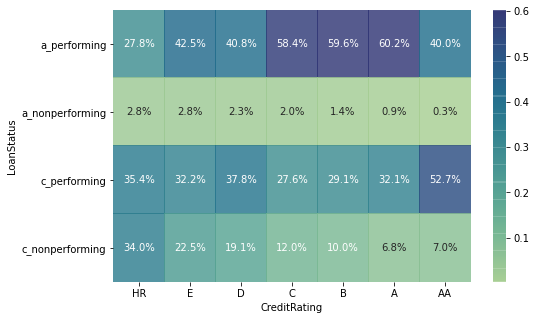

In [65]:
# create df with frequencies of each loan status per credit rating
df_LvT = df_final.groupby('CreditRating')['LoanStatus'].value_counts(normalize=True)
df_LvT = df_LvT.reset_index(name='count')
df_LvT = df_LvT.pivot(index='LoanStatus', columns='CreditRating', values='count')
#plot heatmap
plt.figure(figsize=[8,5])
sb.heatmap(df_LvT, annot=True, cmap="crest", alpha=0.8, fmt=".1%");

As could be expected the way the structure of loan statuses changes across credit ratings is related to rating being more (or less) positive.
This is especially visible for closed nonperforming loans - with the highest share of closed nonperforming for rating HR(34%) and lowest for A and AA ratings (~7%).
There are some irregularities however - if we look at the share of active / closed performing loans across ratings C-A a structural shift towards more active loans is visible, which could indicate that Prosper recently grew a lot in this segment of the loan market. 

#### Loan status vs. Employment status duration

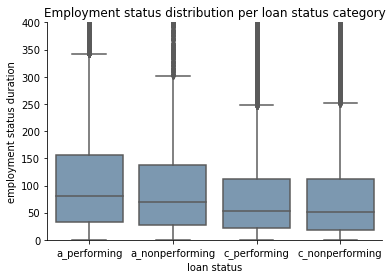

In [66]:
# plot boxplots for Loan status vs Employment status duration
sb.boxplot(data=df_final, x='LoanStatus', y='EmploymentStatusDuration', color=color)
sb.despine()
plt.xlabel('loan status')
plt.ylabel('employment status duration')
plt.title('Employment status distribution per loan status category')
plt.ylim(0,400);

In [67]:
df_final.groupby('LoanStatus')['EmploymentStatusDuration'].agg('median')

LoanStatus
a_performing       80.0
a_nonperforming    69.0
c_performing       53.0
c_nonperforming    51.0
Name: EmploymentStatusDuration, dtype: float64

As could be expected within the active loans categories the performing  have a slighly higher median employment status value and a higher upper IQR limit. Interestingly the same is not true for the closed categories. Here the median for both performing and nonperforming loans is almost identical being 53 months for performing and 51 months for nonperforming. Is seems that this borrower feature will not be particularily relevant for predicting future loan delinquency. Also worth noting is that for the active loans the median employment status duration is higher than for the closed loans, especially when whe look at the active performing category (80 months)

#### Loan status vs. Homeowner status

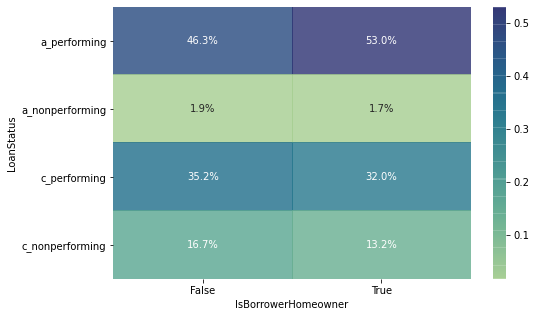

In [68]:
# create df with frequencies of each loan status per credit rating
df_LvT = df_final.groupby('IsBorrowerHomeowner')['LoanStatus'].value_counts(normalize=True)
df_LvT = df_LvT.reset_index(name='count')
df_LvT = df_LvT.pivot(index='LoanStatus', columns='IsBorrowerHomeowner', values='count')
#plot heatmap
plt.figure(figsize=[8,5])
sb.heatmap(df_LvT, annot=True, cmap="crest", alpha=0.8, fmt=".1%");

As for the fact of borrower being a homeowner or not the share of delinquent closed loans is slightly lower for homeowners (15%) as compared with non-homewners (18.5%). The major takeaway however is that homewoners tend to have more active listings than non-homeowners. Again, this might be a result of Propsers credit policy to favor such borrowers.

#### Loan status vs. Debt to income ratio

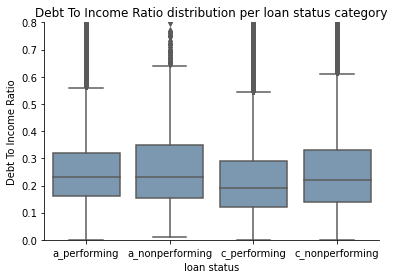

In [69]:
# plot boxplots for Loan status vs Employment status duration
sb.boxplot(data=df_final, x='LoanStatus', y='DebtToIncomeRatio', color=color)
sb.despine()
plt.xlabel('loan status')
plt.ylabel('Debt To Income Ratio')
plt.title('Debt To Income Ratio distribution per loan status category')
plt.ylim(0,0.8);

In [70]:
df_final.groupby('LoanStatus')['DebtToIncomeRatio'].agg('median')

LoanStatus
a_performing       0.23
a_nonperforming    0.23
c_performing       0.19
c_nonperforming    0.22
Name: DebtToIncomeRatio, dtype: float64

The distribution of debt to income ratio (DIR) for performing and nonperforming loans is very similar for active listings - with both categories having median DIR of 0.23.  
Among closed listings however the median DIR is lower for performing (0.19) than for nonperforming (0.22) loans.
In both cases the nonperforming categories have a wider Interquartile range than performing categories. 

#### Loan status vs. Income range

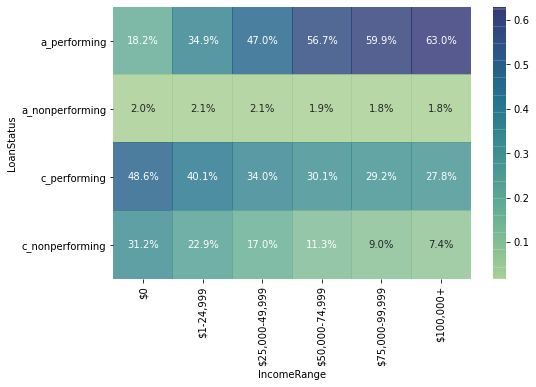

In [71]:
# create df with frequencies of each loan status per credit rating
df_LvT = df_final.groupby('IncomeRange')['LoanStatus'].value_counts(normalize=True)
df_LvT = df_LvT.reset_index(name='count')
df_LvT = df_LvT.pivot(index='LoanStatus', columns='IncomeRange', values='count')
#plot heatmap
plt.figure(figsize=[8,5])
sb.heatmap(df_LvT, annot=True, cmap="crest", alpha=0.8, fmt=".1%");

As could be expected for the active listings the share of performing loans increases with income range and the share of nonperforming loans decreaseses (however marginally) with income range.
An interesing thing however can be observed for the closed listings - here both the share of performing and nonperforming loans decrease with increase of rating. This counterintuitive conclusion is only due to the shift in Prosper portfolio structure - towards more medium and high range income earners. The ratio of delinquent loans for closed listings decreases (as expected) gradually from 0.39 for the lowest income range to 0.21 for the highest income range. 

In [72]:
# do wycięcia!!!
perf = np.array([0.486316, 0.401404, 0.339723, 0.301008, 0.291989, 0.278323])
non = np.array([0.311579, 0.228567, 0.169613, 0.113144, 0.090393, 0.074412])
share = non / (perf + non)
share

array([0.39050126, 0.36282146, 0.33300807, 0.27319438, 0.2363945 ,
       0.21095723])

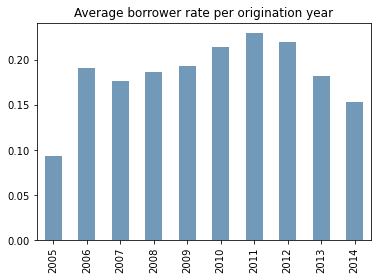

In [73]:
# plot average borrower rate for each origination year
df_re = df_final.copy()
df_re.index = df_re.ListingCreationDate
plot = df_re[['BorrowerRate']].resample('Y').agg('mean').plot(kind='bar', color=color, legend=False)
locs, labels = plt.xticks()
labels = np.arange(2005, 2015, 1)
plt.xticks(locs, labels)
plt.xlabel('')
plt.title('Average borrower rate per origination year');

Average borrower rates were in the range between 17.5 and 20% until 2010 when they increased above 20% for the first time. The highest average borrower rate was recorded for listings originated in 2011 and then it decreased steadily over the following years.

#### Delinquency rate over time

In [74]:
#group data by listing year and loan status
annual_counts = pd.DataFrame(df_final.groupby(pd.Grouper(freq='Y', key='ListingCreationDate'))['LoanStatus'].value_counts()
                             .reset_index(name='count'))
# extract year of creation
annual_counts.ListingCreationDate = annual_counts.ListingCreationDate.astype('str').str[0:4]

In [75]:
# calculate delinquency rates for portfolio, closed listings and active listings and prepare df for visualization
ac_pivot = pd.DataFrame(annual_counts.pivot(index='ListingCreationDate', columns='LoanStatus', values='count'))
ac_pivot.columns = ac_pivot.columns.astype(str)
ac_pivot.replace(np.nan, 0, inplace=True)
ac_pivot['delinquency_rate'] = ac_pivot.apply(lambda row: (row.a_nonperforming + row.c_nonperforming) / row.sum(), axis=1)
ac_pivot['active_delinquency_rate'] = ac_pivot.apply(lambda row: row.a_nonperforming / (row.a_nonperforming + row.a_performing + 0.0001), axis=1)
ac_pivot['closed_delinquency_rate'] = ac_pivot.apply(lambda row: row.c_nonperforming / (row.c_nonperforming + row.c_performing), axis=1)

#drop unnecessary columns
ac_pivot.drop(columns=['a_performing', 'a_nonperforming', 'c_performing', 'c_nonperforming'], inplace=True)
ac_pivot.reset_index(inplace=True)

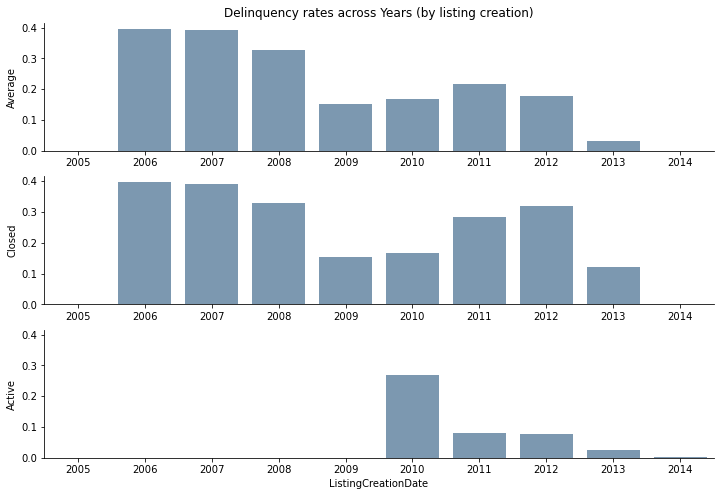

In [76]:
# generate barplot for delinquency rates
plt.figure(figsize=[12,8])

#average delinquency rate
plt1 = plt.subplot(3, 1, 1)
sb.barplot(x="ListingCreationDate", y="delinquency_rate", data=ac_pivot, color=color)
plt.title('Delinquency rates across Years (by listing creation)')
plt.xlabel('')
plt.ylabel('Average')

# acive del rate
plt2 = plt.subplot(3, 1, 2)
sb.barplot(x="ListingCreationDate", y="closed_delinquency_rate", data=ac_pivot, color=color)
plt.ylabel('Closed')
plt.xlabel('')
plt.ylim(plt1.get_ylim())

#closed del rate
plt3 = plt.subplot(3, 1, 3)
sb.barplot(x="ListingCreationDate", y="active_delinquency_rate", data=ac_pivot, color=color)
sb.despine()
plt.ylabel('Active');
plt.ylim(plt1.get_ylim());


As we can see in the above figure there are clear time-related trends visible for the Prosper portfolio in terms of delinquency rates. 2005 should be disregarded as it is not representative due to a very small number of records.
However we can see clearly that between 2006-2007 the delinquency rate for the Prosper portfolio was extremely high (almost 40%). As most Propsper listings have a term of 36 months there are no active listings available and Closed deals parameter equals the average portfolio value.
In 2009 however the delinquency rate improved drastically (this is the year when Prosper introduced its own rating system) and oscillated around 17-22% for the total portfolio and 17%-32% for the closed deals.
The final 2 years depicted in the above figure will also not be representative, as most of the Prosper deals mature after 36months, so data still includes active listings, that until final repayment can still turn out both ways.
It seems however, that the implementation of its proprietary rating system and the shifts in its loan and borrower structure, that we observed in the previous points of analysis improved Prospers portfolio quality.

In [77]:
ac_pivot

LoanStatus,ListingCreationDate,delinquency_rate,active_delinquency_rate,closed_delinquency_rate
0,2005,0.000000,0.000000,0.000000
1,2006,0.395383,0.000000,0.395383
2,2007,0.390992,0.000000,0.390992
3,2008,0.327914,0.000000,0.327914
4,2009,0.152312,0.000000,0.152312
5,2010,0.168897,0.268292,0.168154
6,2011,0.217182,0.080292,0.282578
7,2012,0.177541,0.076863,0.320114
8,2013,0.033123,0.025968,0.121877
9,2014,0.001025,0.001032,0.000000


#### Borrower rate vs. credit rating

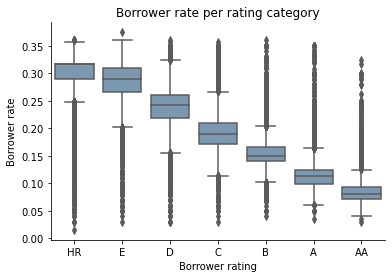

In [78]:
# plot boxplots for Loan status vs Employment status duration
sb.boxplot(data=df_final, x='CreditRating', y='BorrowerRate', color=color)
sb.despine()
plt.xlabel('Borrower rating')
plt.ylabel('Borrower rate')
plt.title('Borrower rate per rating category');

As expected there is a strong correlation between the borrower's rating category and average rate of the loan.

#### Correlation matrix

In [79]:
# add additional year column and remove year 2005 as not representative
df_final['Year'] = df_final['ListingCreationDate'].dt.year
df_final = df_final.loc[~df_final.Year.isin(['2005'])]

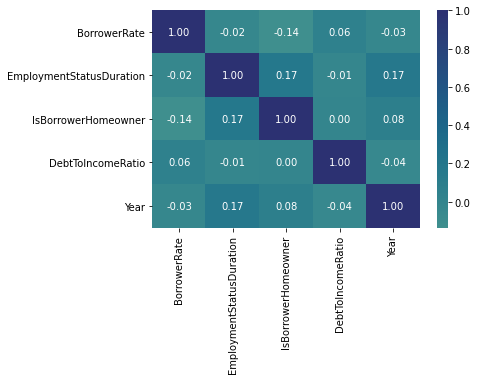

In [80]:
# plot heatmap of correlations between variables
sb.heatmap(df_final.corr(), annot=True, fmt='.2f', center=0, cmap='crest');

As many of the features were categorical the correlation matrix does not include many of the interesting variables. Also there are no significant correlations between the listed variables noticeable.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* Loan Term - even though the 12m category has a very good structure in terms of its share of delinquent loans (only 5% of closed loans were nonperforming) it seems to be almost discontinued, as it's share of performing observations is only 4,4%.
The 60m category on the other hand does not have many observations in the closed categories (only 15% of the total nr of loans), and seemingly has a very good structure in terms of performance (82% of the total portfolio are active_performing and in total 92% are performing loans).

* Borrower rate - as expected the median borrower rates for nonperforming loan statuses are higher than those of performing loan statuses

* Listing Category - Debt consolidation has a better structure in terms of performance compared to the other listing categories (grouped in one bucket).

* Credit Rating - as could be expected the way the structure of loan statuses changes across credit ratings is related to rating being more (or less) positive. This is especially visible for closed nonperforming loans - with the highest share of closed nonperforming for rating HR (34%) and lowest for A and AA ratings (~7%).

*  Employment status duration - within the active loans categories the performing  have a slighly higher median employment status value and a higher upper IQR limit. Interestingly the same is not true for the closed categories. Here the median for both performing and nonperforming loans is almost identical being 53 months for performing and 51 months for nonperforming.

* Homeowner status - as for the fact of borrower being a homeowner or not the share of delinquent closed loans is slightly lower for homeowners (15%) as compared with non-homewners (18.5%)

* Debt to Income Ratio - The distribution of debt to income ratio (DIR) for performing and nonperforming loans is very similar for active listings - with both categories having median DIR of 0.23. Among closed listings however the median DIR is lower for performing (0.19) than for nonperforming (0.22) loans.

* Income range - as could be expected the share of performing loans increases with income range and the share of nonperforming loans decreaseses (however marginally) with income range.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* Delinquency rate over time - between 2006-2007 the delinquency rate for the Prosper portfolio was extremely high (almost 40%). In 2009 however the delinquency rate improved drastically (this is the year when Prosper introduced its own rating system) and oscillated around 17-22% for the total portfolio and 17%-32% for the closed deals.

* there is a strong correlation between the borrower's rating category and average rate of the loan.

## Multivariate Exploration

#### Borrower Rate vs loan status per listing creation year

C:\Users\plesi\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


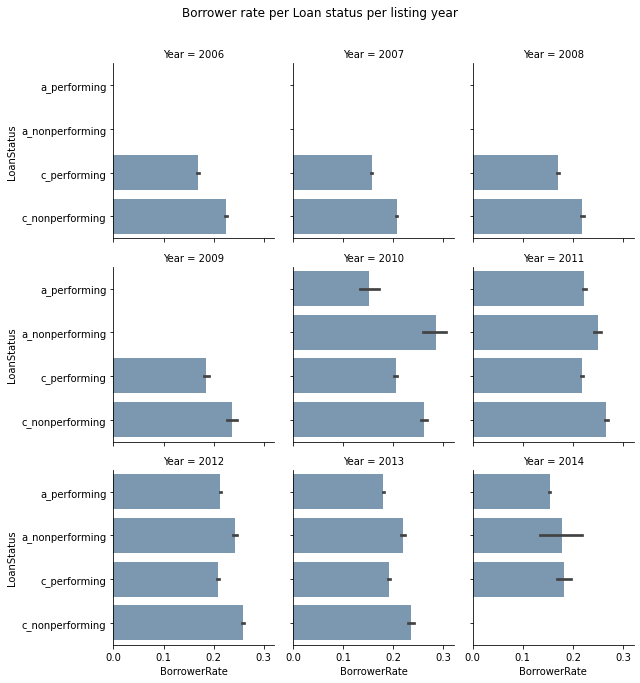

In [81]:
# plot facet grid to depict the relationship between borrower rate, listing creation date and loan category
                       
g1 = sb.FacetGrid(data=df_final, col='Year', col_wrap=3)
g1.map(sb.barplot, 'BorrowerRate', 'LoanStatus', color=color)
g1.fig.suptitle('Borrower rate per Loan status per listing year', y=1.05);


As expected we can observe that borrower rates have been consistently lower for the performing categories as compared to nonperforming categories throughout the years. Also there is a general increase in borrower rates in 2013 and 2015 and then they start to decrease.

#### Loan term vs loan status per listing creation year

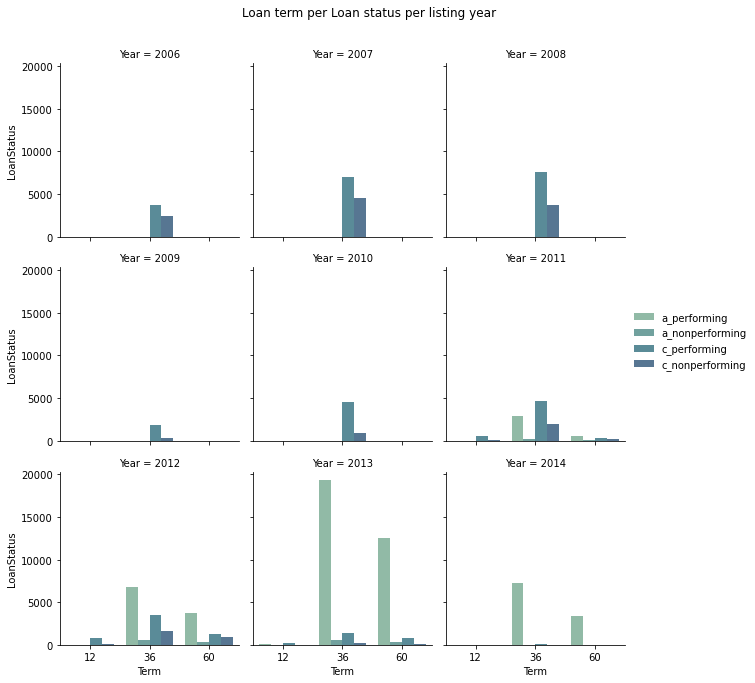

In [82]:
# define wrap up function for countplot to use in facet
def countplot(x, hue, **kwargs):
    sb.countplot(x=x, hue=hue, **kwargs)

# create facet grid with plots
g1 = sb.FacetGrid(data=df_final, col='Year', col_wrap=3)
fig = g1.map(countplot, 'Term', 'LoanStatus', palette='crest', alpha=0.8)
g1.fig.suptitle('Loan term per Loan status per listing year', y=1.05)
fig.add_legend();

We can see clearly that the structure of the prosper portfolio changed over time - since 2014 the 60-month term loans were introduced and they start to be a significant part of the portfolio. The figure above also confirms that number of delinquent loans decreased over time, however as a lof of loans have been originated in 2013 and 2014 this has to further observed.

In [83]:
df_final[df_final['Term'] == 60]['Year'].value_counts()

2013    13739
2012     6294
2014     3371
2011     1098
2010       43
Name: Year, dtype: int64

#### Listing Category vs Term per loan status

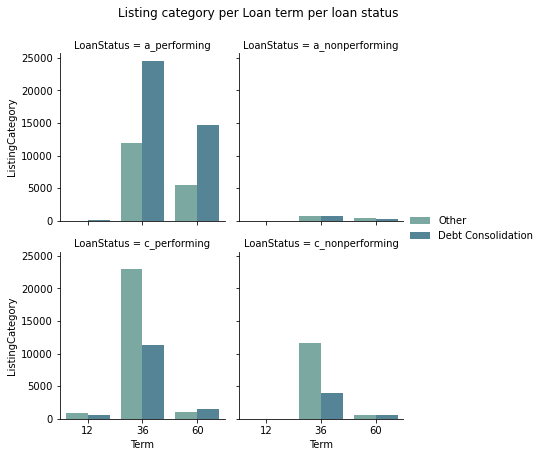

In [1090]:
# create facet grid with plots
g2 = sb.FacetGrid(data=df_final, col='LoanStatus', col_wrap=2)
fig = g2.map(countplot, 'Term', 'ListingCategory', palette='crest', alpha=0.8)
g2.fig.suptitle('Listing category per Loan term per loan status', y=1.05)
fig.add_legend();

Looking at the performing categories it is clearly visibe that the 60-month loans start to make up a large share of Propsers portfolio with most of the loans being in the Debt Consolidation category.
If we compare closed performing and nonperforming loans for the 36 month category (most representative) it is clear that the share of Debt Consolidation in the 36 month closed nonperforming is lower than for the closed performing.
Also looking at the active portfolio for both 36 and 60 month loans we can clearly see, that even though the count of active performing loans im much higher for Debt consolidation, the number of nonperforming listings are almost equal (or even lower) for this category and other purpose loans.

#### Employment duration vs Income Range per Loan Status

C:\Users\plesi\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


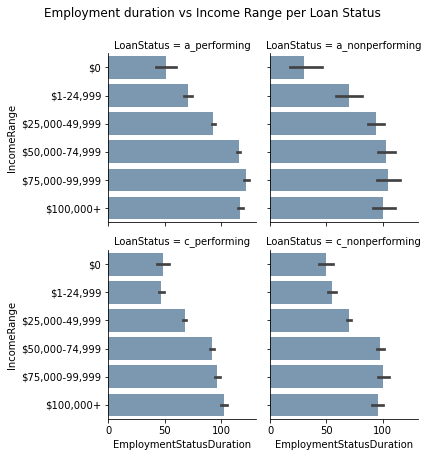

In [1091]:
# create facet grid with bar plots
                       
g1 = sb.FacetGrid(data=df_final, col='LoanStatus', col_wrap=2)
g1.map(sb.barplot, 'EmploymentStatusDuration', 'IncomeRange', color=color)
g1.fig.suptitle('Employment duration vs Income Range per Loan Status', y=1.05);

There are several observations that can be done based on this plot:
* Active loans tend to have longer average employment duration than closed loans,
* Borrowers in middle income ranges (25-100) have longer average employment duration
* There does not seem to be a significant difference in average employment duration per income range between performing and nonperforming loans.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* as expected borrower rates have been consistently lower for the performing categories as compared to nonperforming categories throughout the years,

* Looking at the performing categories it is clearly visible that the 60-month loans start to make up a large share of Propsers portfolio with most of the loans being in the Debt Consolidation category. Also Debt Consolidation & 60 month loans tend to have a lower share of delinquent listings compared to other categories.

* there were not particular observations made with regards to employment status duration vs Income range other than confirming what was already visible after bivariate analysis.